In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [24]:
# Raw data
# Dense results for tasks
dense_results = {
    "RTE": 72.92,
    "MRPC": 89.97,
    "CoLA": 63.4
}
 
data = {
    'MRPC': {
        'experts': [16, 16, 16, 32, 32, 32],
        'select fraction': [0.2, 0.4, 0.6, 0.2, 0.4, 0.6],
        'EMoE': [91.08822982, 90.82894298, 90.10965848, 90.04434088, 90.25682253, 90.60750986],
        'EMoE-learn': [89.90884909, 90.15467046, 90.03663843, 89.31542472, 89.91705742, 90.24278921],
    },
    'CoLA': {
        'experts': [16, 16, 16, 32, 32, 32],
        'select fraction': [0.2, 0.4, 0.6, 0.2, 0.4, 0.6],
        'EMoE': [64.21629632, 64.16175899, 63.64081213, 63.90316781, 63.77963985, 64.76108839],
        'EMoE-learn': [63.79743469, 64.98185791, 64.56988644, 64.89489355, 65.85801824, 64.88865797],
    },
    'RTE': {
        'experts': [16, 16, 16, 32, 32, 32],
        'select fraction': [0.2, 0.4, 0.6, 0.2, 0.4, 0.6],
        'EMoE': [74.60890493, 74.48856799, 73.68351384, 73.08182912, 74.36823105, 74.04452467],
        'EMoE-learn': [71.96149218, 71.60048135, 72.20216606, 71.11913357, 71.11913357, 71.23947052],
    }
}

# Convert raw data into pandas DataFrames for easier plotting
dataframes = {task: pd.DataFrame(data[task]) for task in data}
dataframes['MRPC']  # Displaying MRPC data as an example

,experts,select fraction,EMoE,EMoE-learn
0,16,0.2,91.088230,89.908849
1,16,0.4,90.828943,90.154670
2,16,0.6,90.109658,90.036638
3,32,0.2,90.044341,89.315425
4,32,0.4,90.256823,89.917057
5,32,0.6,90.607510,90.242789


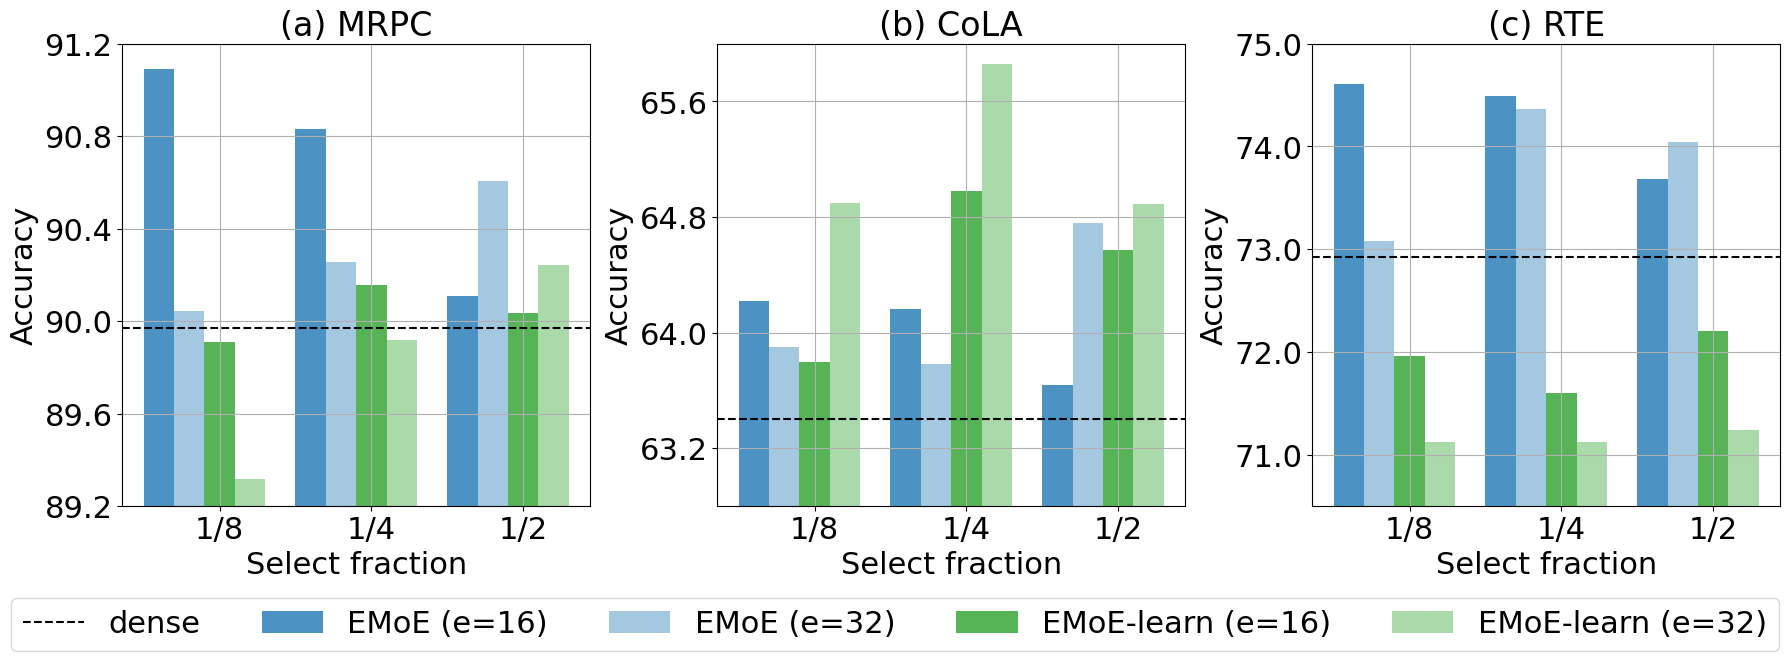

In [128]:
# Different line styles for each method
line_styles = {
    "EMoE": "-",
    "EMoE-learn": ":",
}

y_range = {
    "MRPC": (89.2, 91.2),
    "CoLA": (62.8, 66),
    "RTE": (70.5, 75)
}

font_size_title = 24
font_size_axis_label = 22
font_size_ticks = 22
font_size_legend = 22



# Set up the figure and axes again
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.8)

title_index = ['(a)', '(b)', '(c)']
for idx_task, task in enumerate(dataframes):
    df = dataframes[task]
    df_emo = df[['select fraction', 'EMoE', "experts"]]
    df_emo_learn = df[['select fraction', 'EMoE-learn', "experts"]]
    df_emo_16 = df_emo[df_emo['experts'] == 16]
    df_emo_32 = df_emo[df_emo['experts'] == 32]
    df_emo_learn_16 = df_emo_learn[df_emo_learn['experts'] == 16]
    df_emo_learn_32 = df_emo_learn[df_emo_learn['experts'] == 32]
    
    axs[idx_task].bar(
        df_emo_16['select fraction'] - 0.08,
        df_emo_16['EMoE'],
        width=0.04,
        label='EMoE (e=16)',
        color='tab:blue',
        alpha=0.8
    )
    axs[idx_task].bar(
        df_emo_32['select fraction'] - 0.04,
        df_emo_32['EMoE'],
        width=0.04,
        label='EMoE (e=32)',
        color='tab:blue',
        alpha=0.4
    )
    axs[idx_task].bar(
        df_emo_learn_16['select fraction'],
        df_emo_learn_16['EMoE-learn'],
        width=0.04,
        label='EMoE-learn (e=16)',
        color='tab:green',
        alpha=0.8
    )
    axs[idx_task].bar(
        df_emo_learn_32['select fraction']+0.04,
        df_emo_learn_32['EMoE-learn'],
        width=0.04,
        label='EMoE-learn (e=32)',
        color='tab:green',
        alpha=0.4
    )
    
    # Add dense result as a horizontal line
    axs[idx_task].axhline(dense_results[task], color='black', linestyle='--', label='dense')
    
    axs[idx_task].set_xticks([0.2, 0.4, 0.6])
    axs[idx_task].set_xticklabels(["1/8", "1/4", "1/2"])
    
    axs[idx_task].set_title(f"{title_index[idx_task]} {task}", fontsize=font_size_title)
    axs[idx_task].set_xlabel("Select fraction", fontsize=font_size_axis_label)
    axs[idx_task].set_ylabel("Accuracy", fontsize=font_size_axis_label)
    axs[idx_task].grid(True)
    
    axs[idx_task].set_ylim(y_range[task]) # Set y-axis limits
    axs[idx_task].yaxis.set_major_formatter(plt.FormatStrFormatter('%.1f'))

    axs[idx_task].yaxis.set_major_locator(plt.MaxNLocator(5))
    axs[idx_task].tick_params(axis='both', which='major', labelsize=font_size_ticks)

handles, labels = axs[0].get_legend_handles_labels()
common_legend = fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), ncol=len(labels), fontsize=font_size_legend)
# common_legend.set_title('Legend', prop={'size': font_size_legend})
# Adjust subplot layout to accommodate the common legend
plt.subplots_adjust(bottom=0.4)


plt.tight_layout()
plt.savefig('ablation.pdf', bbox_inches='tight', pad_inches=0)
plt.savefig('ablation.png', bbox_inches='tight', pad_inches=0)
plt.show()
    